In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataset

In [3]:
user = pd.read_csv('./data/user_table.csv')
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [4]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  90400 non-null  int64 
 1   date     90400 non-null  object
 2   device   90400 non-null  object
 3   sex      90400 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [5]:
home_page = pd.read_csv('./data/home_page_table.csv')
home_page.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [6]:
home_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  90400 non-null  int64 
 1   page     90400 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [7]:
search_page = pd.read_csv('./data/search_page_table.csv')
search_page.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [8]:
search_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  45200 non-null  int64 
 1   page     45200 non-null  object
dtypes: int64(1), object(1)
memory usage: 706.4+ KB


In [9]:
payment_page=pd.read_csv('./data/payment_page_table.csv')
payment_page.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [10]:
payment_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  6030 non-null   int64 
 1   page     6030 non-null   object
dtypes: int64(1), object(1)
memory usage: 94.3+ KB


In [11]:
payment_confirmation=pd.read_csv('./data/payment_confirmation_table.csv')
payment_confirmation.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [12]:
payment_confirmation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  452 non-null    int64 
 1   page     452 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.2+ KB



# Analyze by describing data 


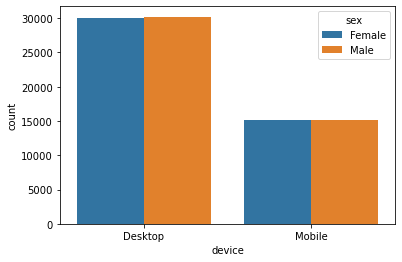

In [13]:
sns.countplot(x = 'device', hue = 'sex', data=user)

In [14]:
user['user_id'].is_unique

True

In [15]:
print(user['date'].min())
print(user['date'].max())

2015-01-01
2015-04-30



# Data Processing 

## merge the tables

In [16]:
data = pd.merge(left = user, right = home_page, how = 'left', on = 'user_id')
data = pd.merge(left=data, right=search_page, how='left', on='user_id', suffixes=('_home', '_search'))
data = pd.merge(left=data, right=payment_page, how='left', on='user_id')
data = pd.merge(left=data, right=payment_confirmation, how='left', on='user_id', suffixes=('_payment', '_confirmation'))

In [17]:
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


#### Show the trend of the user

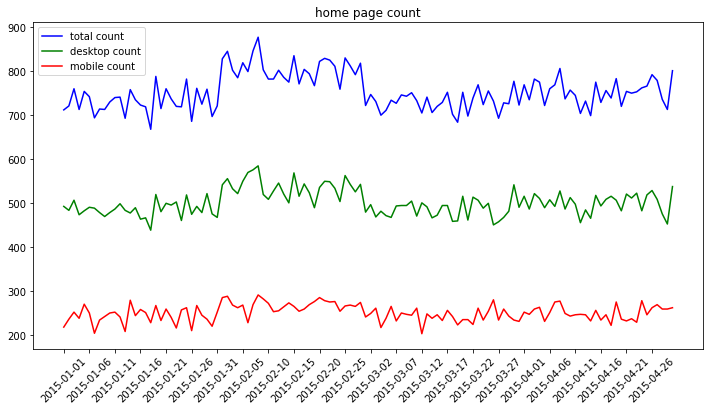

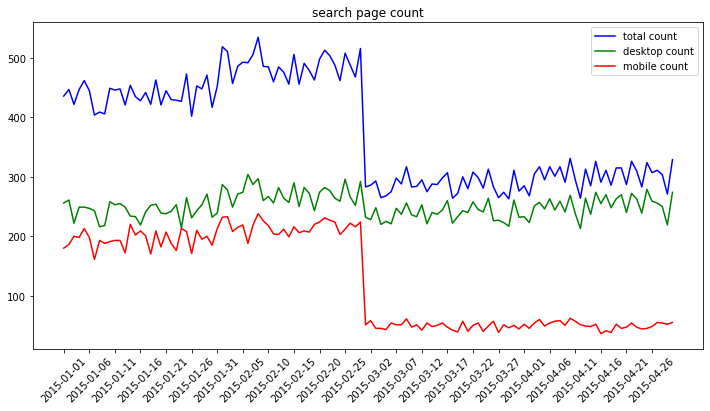

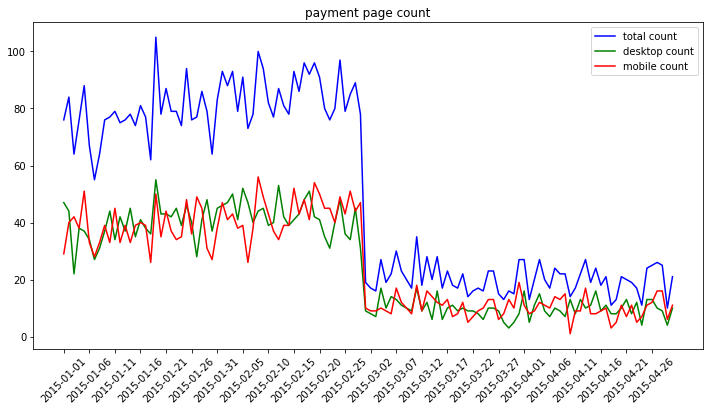

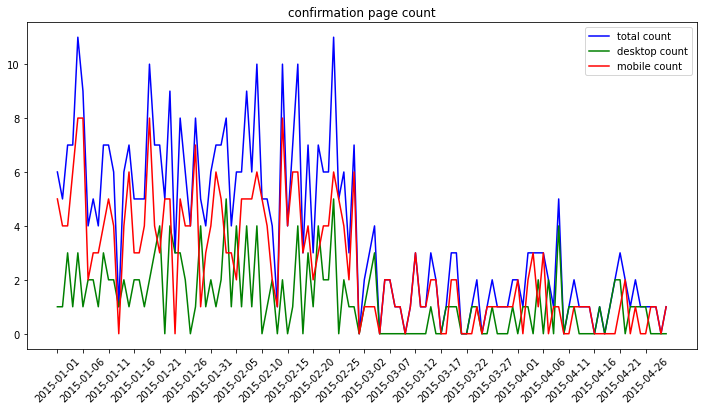

In [18]:
date_groupby = data.groupby('date').count()
desktop_groupby = data[(data['device'] == 'Desktop')].groupby('date').count()
mobile_groupby = data[(data['device'] == 'Mobile')].groupby('date').count()


plt.figure(figsize=(12, 6))
plt.plot(date_groupby['page_home'], color='blue', label='total count')
plt.plot(desktop_groupby['page_home'], color='green', label='desktop count')
plt.plot(mobile_groupby['page_home'], color='red', label='mobile count')
plt.title("home page count")
plt.xticks(date_groupby.index[::5], rotation=45)
plt.legend()




plt.figure(figsize=(12, 6))
plt.plot(date_groupby['page_search'], color='blue', label='total count')
plt.plot(desktop_groupby['page_search'], color='green', label='desktop count')
plt.plot(mobile_groupby['page_search'], color='red', label='mobile count')
plt.title("search page count")
plt.xticks(date_groupby.index[::5], rotation=45)
plt.legend()


plt.figure(figsize=(12, 6))
plt.plot(date_groupby['page_payment'], color='blue', label='total count')
plt.plot(desktop_groupby['page_payment'], color='green', label='desktop count')
plt.plot(mobile_groupby['page_payment'], color='red', label='mobile count')
plt.title("payment page count")
plt.xticks(date_groupby.index[::5], rotation=45)
plt.legend()


plt.figure(figsize=(12, 6))
plt.plot(date_groupby['page_confirmation'], color='blue', label='total count')
plt.plot(desktop_groupby['page_confirmation'], color='green', label='desktop count')
plt.plot(mobile_groupby['page_confirmation'], color='red', label='mobile count')
plt.title("confirmation page count")
plt.xticks(date_groupby.index[::5], rotation=45)
plt.legend()


### Conversion rate for the previous page, including desktop and mobile 

In [19]:
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [33]:
'''the precent of home page retention to search page'''
home_conversion = data['page_search'].notnull().sum()/len(data)
print(home_conversion)

0.5


In [34]:
'''the precent of search page retention to payment page'''
search_conversion = data['page_payment'].notnull().sum()/(data['page_search'].notnull().sum())
print(search_conversion)

0.1334070796460177


In [35]:
'''the precent of payment page retention to payment confirmation page'''
payment_conversion = data['page_confirmation'].notnull().sum()/(data['page_payment'].notnull().sum())
print(payment_conversion)

0.07495854063018242


In [37]:
rate = [home_conversion, search_conversion, payment_conversion]
page = ['home', 'search', 'payment']
maps = {'page': page, 'rate': rate}
overall_con = pd.DataFrame(maps)
overall_con

,page,rate
0,home,0.500000
1,search,0.133407
2,payment,0.074959


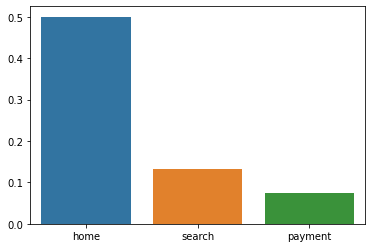

In [39]:
sns.barplot(x=page, y=rate, data=overall_con)

In [40]:
'''Build a conversion rate funciton'''
def conversion(data):
    home_conversion = data['page_search'].notnull().sum()/len(data)
    search_conversion = data['page_payment'].notnull().sum()/(data['page_search'].notnull().sum())
    payment_conversion = data['page_confirmation'].notnull().sum()/(data['page_payment'].notnull().sum())
    return [home_conversion, search_conversion, payment_conversion]
    

In [51]:
'''device'''
desktop_con = conversion(data[data['device'] == 'Desktop'])
mobile_con = conversion(data[data['device'] == 'Mobile'])

device_map = {'page': page,
              'desktop': desktop_con,
              'mobile': mobile_con}
device_con = pd.DataFrame(device_map)


In [45]:
device_con

,page,desktop,mobile
0,home,0.500000,0.5
1,search,0.100000,0.2
2,payment,0.049834,0.1


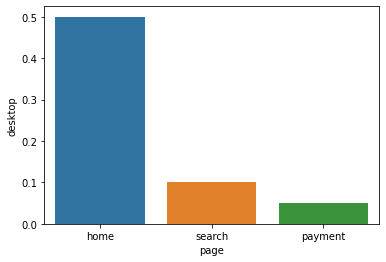

In [49]:
sns.barplot(x='page', y='desktop', data=device_con)

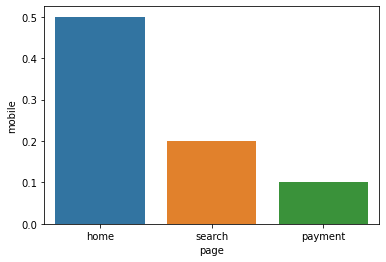

In [50]:
sns.barplot(x='page', y='mobile', data=device_con)

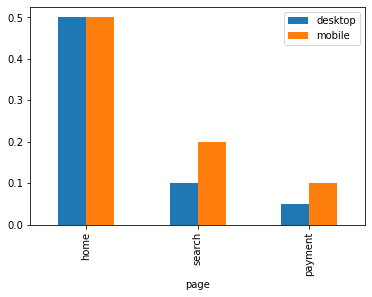

In [57]:
device_con.plot(kind='bar', x='page', y=['desktop', 'mobile'])

In [52]:
'''sex'''
male_con = conversion(data[data['sex'] == 'Male'])
female_con = conversion(data[data['sex'] == 'Female'])

sex_map = {'page': page,
              'male': male_con,
              'female': female_con}
sex_con = pd.DataFrame(sex_map)

In [53]:
sex_con

,page,male,female
0,home,0.496944,0.503073
1,search,0.130083,0.136708
2,payment,0.072014,0.077742


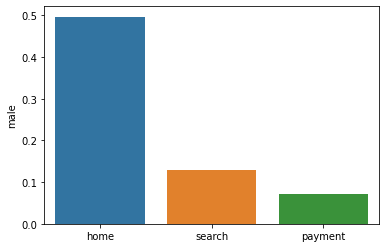

In [55]:
sns.barplot(x='page', y='male', data=sex_con)

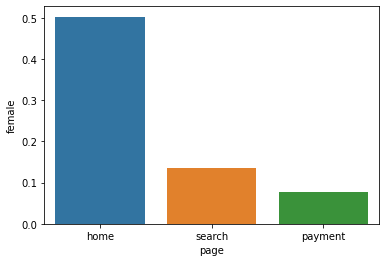

In [56]:
sns.barplot(x='page', y='female', data=sex_con)

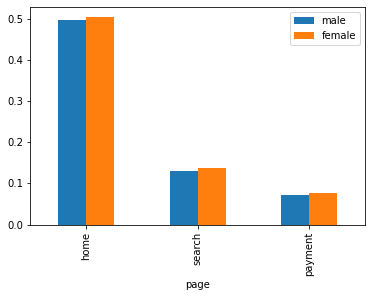

In [60]:
sex_con.plot(kind='bar', x='page', y=['male', 'female'])

#### From the previous trend plot, we can see that there is a sudden decrease in the page search. To be more specific, the decrease from mobile users. Let's try to find the date and the reason.

In [61]:
date_groupby.head()

,user_id,device,sex,page_home,page_search,page_payment,page_confirmation
date,,,,,,,
2015-01-01,712,712,712,712,436,76,6
2015-01-02,721,721,721,721,447,84,5
2015-01-03,760,760,760,760,422,64,7
2015-01-04,713,713,713,713,447,76,7
2015-01-05,754,754,754,754,462,88,11


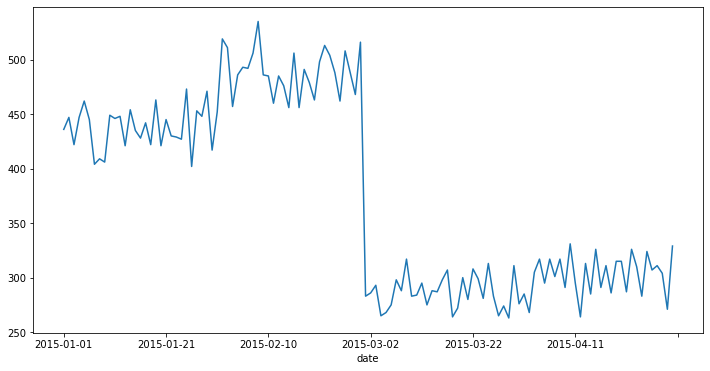

In [74]:
date_groupby[(date_groupby.index > '2015-02-10') & (date_groupby.index < '2015-03-01')]

plt.figure(figsize=(12, 6))
date_groupby['page_search'].plot()

In [75]:
date_groupby[(date_groupby.index > '2015-02-20') & (date_groupby.index < '2015-03-10')]


,user_id,device,sex,page_home,page_search,page_payment,page_confirmation
date,,,,,,,
2015-02-21,829,829,829,829,513,80,7
2015-02-22,825,825,825,825,504,76,6
2015-02-23,811,811,811,811,488,80,6
2015-02-24,759,759,759,759,462,97,11
2015-02-25,830,830,830,830,508,79,5
2015-02-26,812,812,812,812,488,85,6
2015-02-27,792,792,792,792,468,89,3
2015-02-28,818,818,818,818,516,78,7
2015-03-01,722,722,722,722,283,19,0


#### This sudden decrease appeared on 03/01

In [79]:
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [80]:
'''device'''
desktop_con_befor = conversion(data[(data['date'] < '2015-03-01') & (data['device'] == 'Desktop')])
mobile_con_befor = conversion(data[(data['date'] < '2015-03-01') & (data['device'] == 'Mobile')])

desktop_con_after = conversion(data[(data['date'] > '2015-03-01') & (data['device'] == 'Desktop')])
mobile_con_after = conversion(data[(data['date'] > '2015-03-01') & (data['device'] == 'Mobile')])

                                   
device_map = {'page': page,
              'desktop_befor': desktop_con_befor,
              'mobile_befor': mobile_con_befor,
              'desktop_after': desktop_con_after,
              'mobile_after': mobile_con_after,
             }
device_con = pd.DataFrame(device_map)

In [81]:
device_con

,page,desktop_befor,mobile_befor,desktop_after,mobile_after
0,home,0.503688,0.800000,0.496523,0.199825
1,search,0.159092,0.197848,0.040049,0.208825
2,payment,0.047264,0.103766,0.061121,0.087097


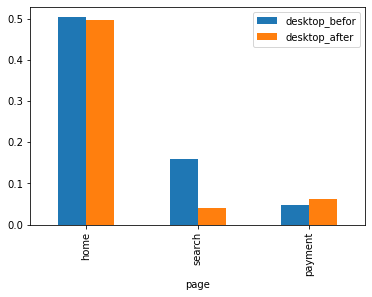

In [85]:
device_con.plot(kind = 'bar', x='page', y=['desktop_befor','desktop_after'])

###### From the plot, for the desktop device, we can figure out the conversion rate from the search page to payment page has changed significantly 

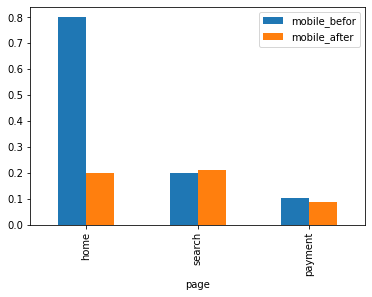

In [86]:
device_con.plot(kind = 'bar', x='page', y=['mobile_befor','mobile_after'])

#### From the plot, for the mobile device, we can figure out the conversion rate from the home page to search page has changed significantly 